<a href="https://colab.research.google.com/github/aasrithalella1/PDS/blob/main/PDS_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Loading the dataset
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#PART A- Sample of 25 & Glucose Comparison

In [51]:
# Set a seed
np.random.seed(42)

In [52]:
#random sample of 25 rows
sample_25 = df.sample(n=25, random_state=42)

In [53]:
# Calculated mean and max Glucose in sample and population
sample_mean = sample_25['Glucose'].mean()
sample_max = sample_25['Glucose'].max()

In [54]:
pop_mean = df['Glucose'].mean()
pop_max = df['Glucose'].max()

In [55]:
print("Sample Mean Glucose:", round(sample_mean, 2))
print("Population Mean Glucose:", round(pop_mean, 2))
print("Sample Max Glucose:", sample_max)
print("Population Max Glucose:", pop_max)

Sample Mean Glucose: 116.64
Population Mean Glucose: 120.89
Sample Max Glucose: 183
Population Max Glucose: 199


In [56]:
# Creating bar charts to compare
labels = ['Sample', 'Population']
means = [sample_mean, pop_mean]
max_values = [sample_max, pop_max]

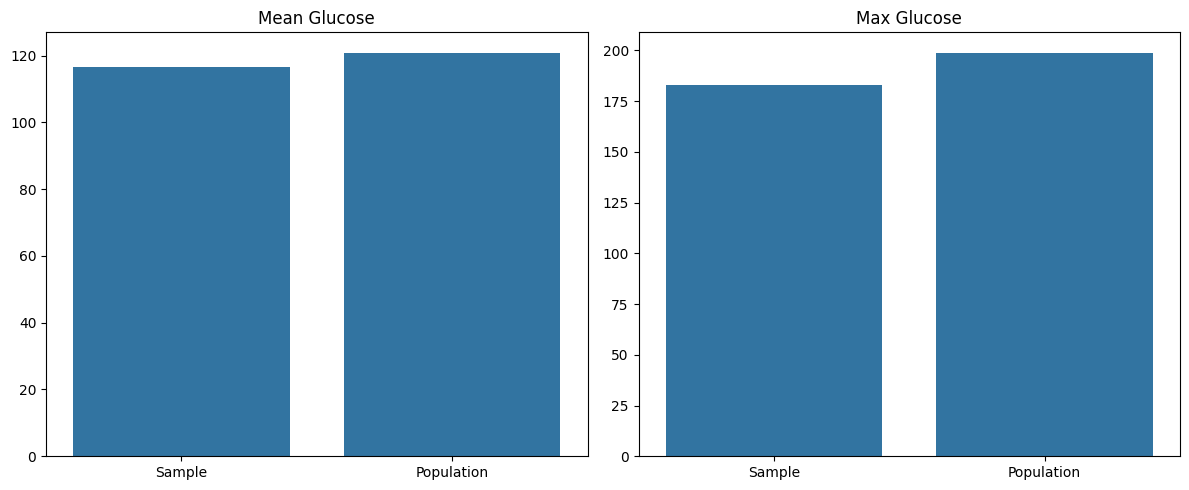

In [57]:
# Ploting the comparison
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(x=labels, y=means)
plt.title("Mean Glucose")

plt.subplot(1,2,2)
sns.barplot(x=labels, y=max_values)
plt.title("Max Glucose")

plt.tight_layout()
plt.show()

From the random sample of 25 patients, the mean Glucose was slightly lower than the population mean. Similarly, the maximum Glucose in the sample was less than the population max. This shows that small samples may not always capture the extreme values of a population, and the average might vary due to randomness.

#PART B- 98th Percentile of BMI

sample 98th Percentile BMI: 40.25
Population 98th Percentile BMI: 47.53


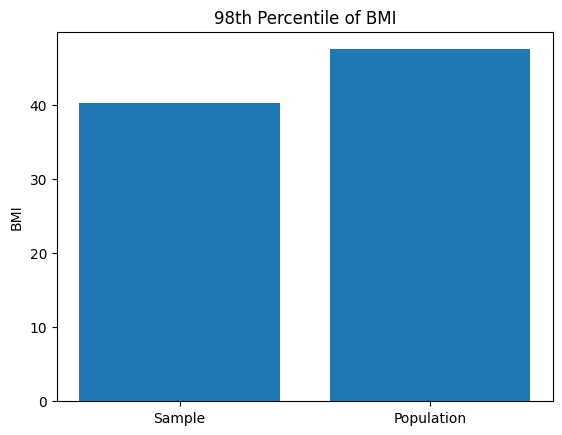

In [58]:
# Calculating 98th percentile of BMI in sample and population
sample_bmi_98 = sample_25['BMI'].quantile(0.98)
pop_bmi_98 = df['BMI'].quantile(0.98)

print("sample 98th Percentile BMI:", round(sample_bmi_98, 2))
print("Population 98th Percentile BMI:", round(pop_bmi_98, 2))

# Ploting data
plt.bar(['Sample', 'Population'], [sample_bmi_98, pop_bmi_98])
plt.title("98th Percentile of BMI")
plt.ylabel("BMI")
plt.show()

The 98th percentile of BMI in the sample was lower than the population. This is expected because a small sample might miss the individuals with the highest BMI values. Percentiles, especially high ones like 98th, are more sensitive to sample size

#PART C- Bootstrap Sampling of BloodPressure

In [59]:
# Created empty lists to store results
bootstrap_means = []
bootstrap_stds = []
bootstrap_p98 = []

In [60]:
# Loop to create 500 bootstrap samples
for i in range(500):
    boot_sample = df.sample(n=150, replace=True)
    bp = boot_sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_p98.append(bp.quantile(0.98))

In [61]:
# To Calculate average of bootstrap statistics
avg_boot_mean = np.mean(bootstrap_means)
avg_boot_std = np.mean(bootstrap_stds)
avg_boot_p98 = np.mean(bootstrap_p98)

In [62]:
# Population values
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_p98 = df['BloodPressure'].quantile(0.98)

In [63]:
print("Bootstrap Avg Mean BP:", round(avg_boot_mean, 2))
print("Population Mean BP:", round(pop_mean, 2))
print("Bootstrap Avg Std Dev BP:", round(avg_boot_std, 2))
print("Population Std Dev BP:", round(pop_std, 2))
print("Bootstrap Avg 98th Percentile BP:", round(avg_boot_p98, 2))
print("Population 98th Percentile BP:", round(pop_p98, 2))

Bootstrap Avg Mean BP: 69.18
Population Mean BP: 69.11
Bootstrap Avg Std Dev BP: 19.07
Population Std Dev BP: 19.36
Bootstrap Avg 98th Percentile BP: 97.9
Population 98th Percentile BP: 99.32


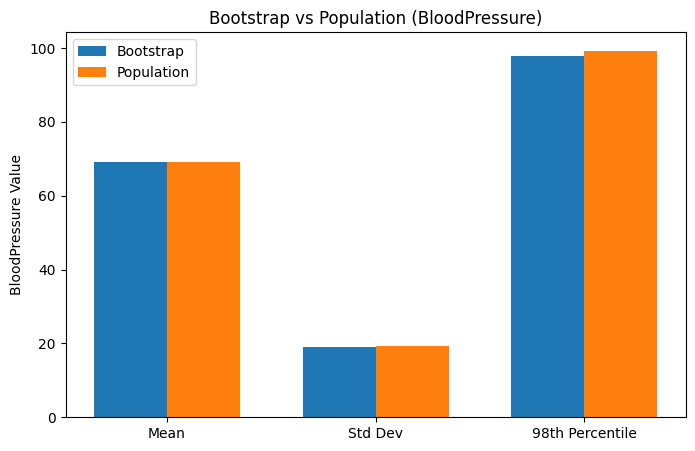

In [64]:
# Ploting all together
labels = ['Mean', 'Std Dev', '98th Percentile']
bootstrap_stats = [avg_boot_mean, avg_boot_std, avg_boot_p98]
pop_stats = [pop_mean, pop_std, pop_p98]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, bootstrap_stats, width, label='Bootstrap')
plt.bar(x + width/2, pop_stats, width, label='Population')
plt.xticks(x, labels)
plt.ylabel('BloodPressure Value')
plt.title("Bootstrap vs Population (BloodPressure)")
plt.legend()
plt.show()

Using 500 bootstrap samples each with 150 patients, I calculated the average mean, standard deviation, and 98th percentile of BloodPressure. The results were very close to the actual population values. This shows that bootstrap sampling is a reliable method to estimate population statistics, especially when the full data might not be available